In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio as ta
from matplotlib.animation import FuncAnimation

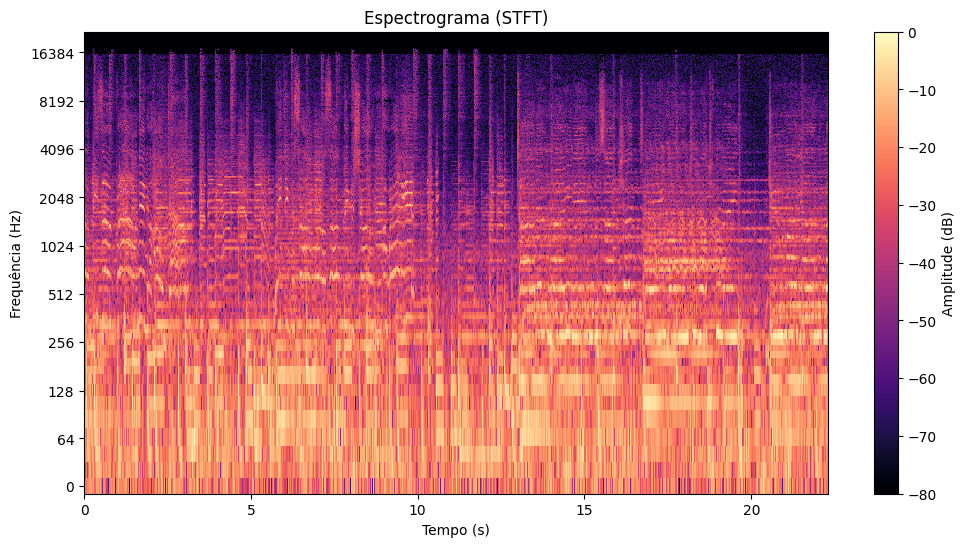

In [14]:
y, sr = librosa.load("time2.mp3", sr=None)


D = np.abs(librosa.stft(y))



#O D seria os valores de cada intervalo do sinal de áudio ou seja cada valor printado seria o vetor entregue pela stft

# Converter para escala logarítmica 
D_db = librosa.amplitude_to_db(D, ref=np.max)


# O que seria o db?   

#os valores de db seriam os valores do sinal que é entregue pela 

# Plotar o espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(D_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(label="Amplitude (dB)")
plt.title("Espectrograma (STFT)")
plt.xlabel("Tempo (s)")
plt.ylabel("Frequência (Hz)")
plt.show()


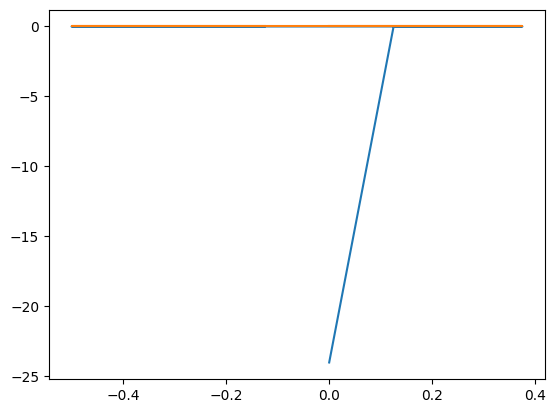

In [15]:
y, sr = librosa.load("time2.mp3", sr=None)

D = librosa.fft_frequencies()


D1 = librosa.fourier_tempo_frequencies()
#print(f"Pegando a transformada de fourier tempo frequência {D1}")

D2 = librosa.stft(y)



t = np.arange(8)
#sp = np.fft.fft(np.sin(t))
sp = np.fft.fft(np.exp(256j * np.pi * t ) * -3)
freq = np.fft.fftfreq(t.shape[-1])

plt.plot(freq, sp.real, freq, sp.imag)
plt.show()


t2 = torch.arange(16)

t2T = torch.fft.fft(t2)


TimePinkFloyd = ta.load("time2.mp3")



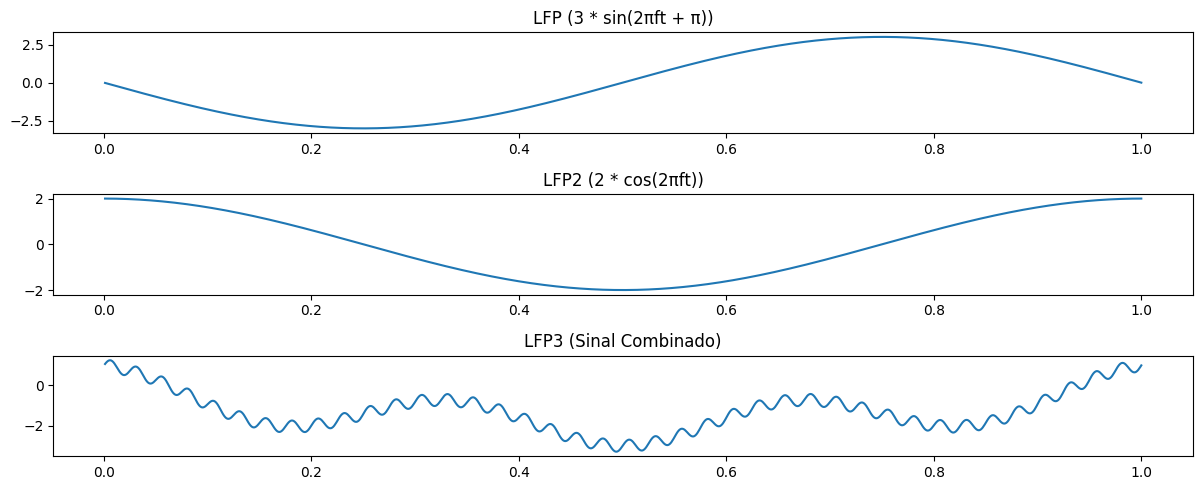

In [16]:
dt = 0.001 
srate = 1000 #amostragem por segundo 
f = 1 #frequencia em HZ do sinal
t = np.arange(dt , 1 + dt, dt)

LFP = 3 * np.sin(2 * np.pi * f * t + np.pi)
LFP2 = 2 * np.cos( 2 * np.pi * f * t)
LFP3 = 2 * np.sin(2 * np.pi * 0.5 * t + np.pi) + np.sin(2 * np.pi * 3 * t + np.pi/2) + 0.3 * np.sin(2 * np.pi * 40*t)

plt.figure(figsize=(12, 5))
plt.subplot(3, 1, 1)
plt.plot(t, LFP)
plt.title("LFP (3 * sin(2πft + π))")

plt.subplot(3, 1, 2)
plt.plot(t, LFP2)
plt.title("LFP2 (2 * cos(2πft))")

plt.subplot(3, 1, 3)
plt.plot(t, LFP3)
plt.title("LFP3 (Sinal Combinado)")

plt.tight_layout()
plt.show()


list1 = np.arange(0,120,0.2)
list2 = np.arange(0,120,0.2)
list3 = np.arange(0,120,0.2)

list1F = np.array(list1)[:, None] * LFP
list2F = np.array(list2)[:, None] * LFP2
list3F = np.array(list3)[:, None] * LFP3

#print(LFP)

#print(list1F)

X_t1 = np.fft.fft(LFP)
X_t2 = np.fft.fft(LFP2)
X_t3 = np.fft.fft(LFP3)






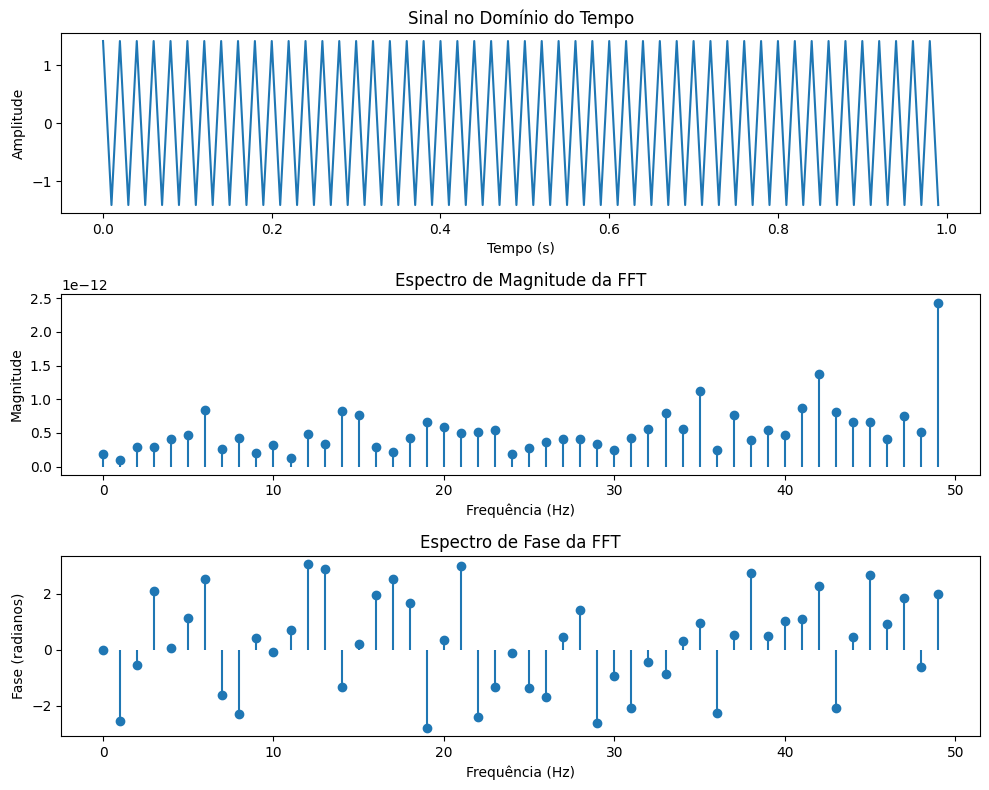

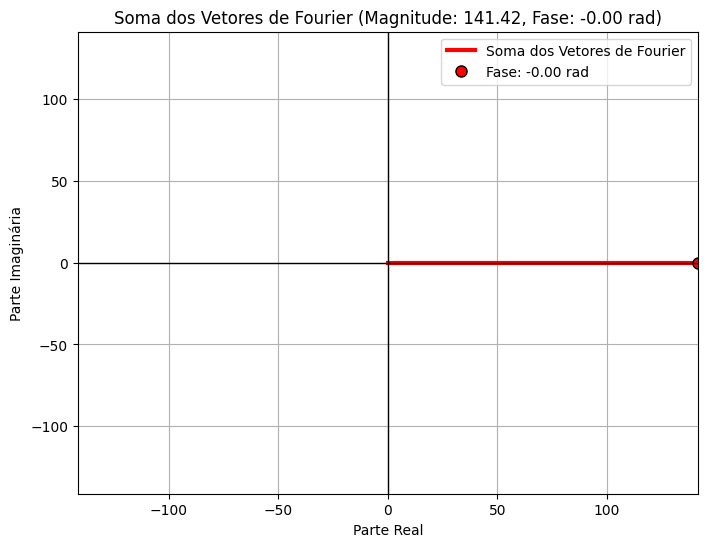

In [17]:
fs = 100 #taxa de amostragem 
T = 1 #duração do sinal 
t = np.linspace(0 , T , fs , endpoint=False) #tempo 

f1 , f2 = 50 , 150 #Hz

LFP4 = 3 * np.sin(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t + np.pi/4)

X_t4 = np.fft.fft(LFP4)

N = len(X_t4)
freqs = np.fft.fftfreq(N , d=1/fs) #eixo de frequencias 

N_half = N // 2
freqs = freqs[:N_half]
X_t4_mag = np.abs(X_t4[:N_half]) #magnetude 
X_t4_fase = np.angle(X_t4[:N_half]) #fase sendo um ângulo 

fig , axs = plt.subplots(3 , 1 , figsize=(10 , 8))

# Sinal no domínio do tempo
axs[0].plot(t, LFP4)
axs[0].set_title("Sinal no Domínio do Tempo")
axs[0].set_xlabel("Tempo (s)")
axs[0].set_ylabel("Amplitude")

# Magnitude da FFT
axs[1].stem(freqs, X_t4_mag, basefmt=" ")
axs[1].set_title("Espectro de Magnitude da FFT")
axs[1].set_xlabel("Frequência (Hz)")
axs[1].set_ylabel("Magnitude")

# Fase da FFT
axs[2].stem(freqs, X_t4_fase, basefmt=" ")
axs[2].set_title("Espectro de Fase da FFT")
axs[2].set_xlabel("Frequência (Hz)")
axs[2].set_ylabel("Fase (radianos)")


plt.tight_layout()
plt.show()


soma_X = np.sum(X_t4)

real_soma = np.real(soma_X)
imag_soma = np.imag(soma_X)
fase_soma = np.angle(soma_X)
magnitude_soma = np.abs(soma_X)

plt.figure(figsize=(8, 6))


plt.plot([0, real_soma], [0, imag_soma], 'r-', linewidth=3, label='Soma dos Vetores de Fourier')
plt.plot(real_soma, imag_soma, 'ko', markerfacecolor='r', markersize=8, label=f'Fase: {fase_soma:.2f} rad')

# Estilizando o gráfico
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim([-magnitude_soma, magnitude_soma])
plt.ylim([-magnitude_soma, magnitude_soma])
plt.title(f"Soma dos Vetores de Fourier (Magnitude: {magnitude_soma:.2f}, Fase: {fase_soma:.2f} rad)")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.legend()
plt.grid(True)

plt.show()

### Parte discreta da transformada de fourier 

Diferente da parte contínua ou a forma analítica da transformada de fourier que segue $ \int ^{\infty} _ {-\infty} x(t) e^{i2\pi ft} dt$

### Parte discreta 

Todavia a parte discreta segue em segmentações da função de onda com relação ao domínio do tempo 

A formula da transformada discreta de fourier se baseia no somatório de todas as amostras 

$$ X_k = \sum ^{N-1} _{n=0} x_n * \exp ^ {-i2\pi kn / N}$$

dando igualdade ao substituir a parte complexa e polar pela formula de Euler  $ cos(x) + isin(x) = \exp^{ix}$

Logo temos:
$$ \sum ^{N-1} _{n=0} x_n[cos(2\pi kn/N) - i * sin(2\pi kn/ N)] $$

Sendo 
- N = número de amostras 
- n = amostra atual 
- k = frequência atual, onde $k \in [0, N - 1]$
- x_n = O sinal do valor na amostra n
- X_k = A DFT que inclui tanto a informação da fase quanto da amplitude 

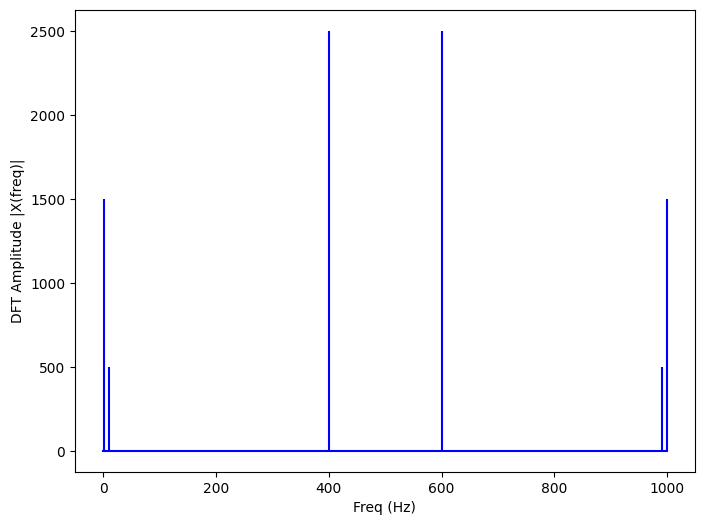

In [18]:
######## Aplicando a parte discreta da transformada de fourier 

def DFT(x):
    
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N , 1))
    e = np.exp(-2j * np.pi * k *n / N)
    
    X = np.dot(e , x)
    
    return X 

# sampling rate
sr = 1000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)



freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 10
x += np.sin(2*np.pi*freq*t)

freq = 400 
x += 5* np.sin(2*np.pi*freq*t)

X = DFT(x)

N = len(x)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()
   

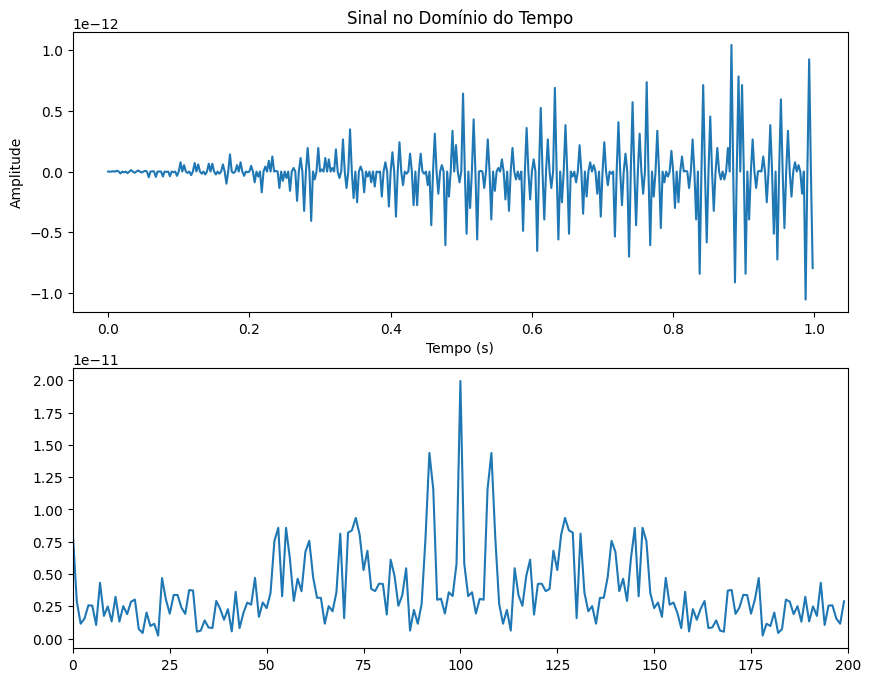

In [19]:
#3 * np.sin(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t + np.pi/4)
f = 400 #amostragem
T = 1 #tempo
t = np.linspace(0 , T , f, endpoint=False)
f1 = 3 * np.sin(2 * np.pi * 100 * t) * np.sin( 4 * np.pi * 200 *t)
n = f1.size

fft = np.fft.fft(f1)
freq = np.fft.fftfreq(n , d=1/f)
mag = np.abs(fft)

fft_sh = np.fft.fftshift(fft)
freq_sh = np.fft.fftshift(freq)
mag_sh = np.abs(fft_sh)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Sinal no domínio do tempo
axs[0].plot(t, f1)
axs[0].set_title("Sinal no Domínio do Tempo")
axs[0].set_xlabel("Tempo (s)")
axs[0].set_ylabel("Amplitude")

axs[1].plot(freq_sh, mag_sh)
#axs[1].set_title("Sinal no Domínio do Tempo")
#axs[1].set_xlabel("Tempo (s)")
#axs[1].set_ylabel("Amplitude")
axs[1].set_xlim(0, f // 2)


plt.show()

### Fazer a fft numpy e inversa 


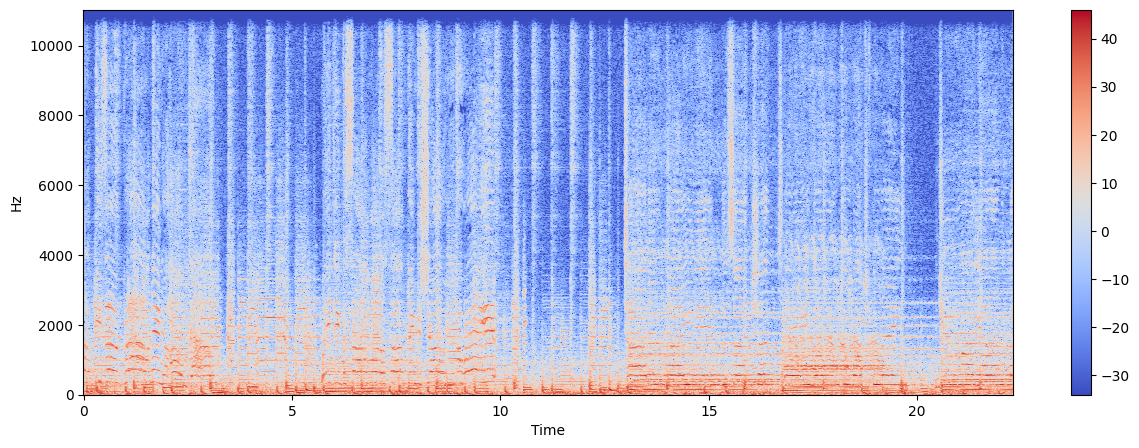

In [20]:
import os 
import librosa as lib 
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display as libD

file = 'time2.mp3'
x , sr = lib.load(file)

X = lib.stft(x)
Xdb = lib.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))

libD.specshow(Xdb , sr=sr , x_axis='time', y_axis='hz')
plt.colorbar()




### Explorar esse espectograma em redes neurais 

Ideias para o espectograma
- AST Audio Spectogram Transformer
- Mel-spectogram 
- MFCCs
- CQT (Constant-Q Transform) (música )

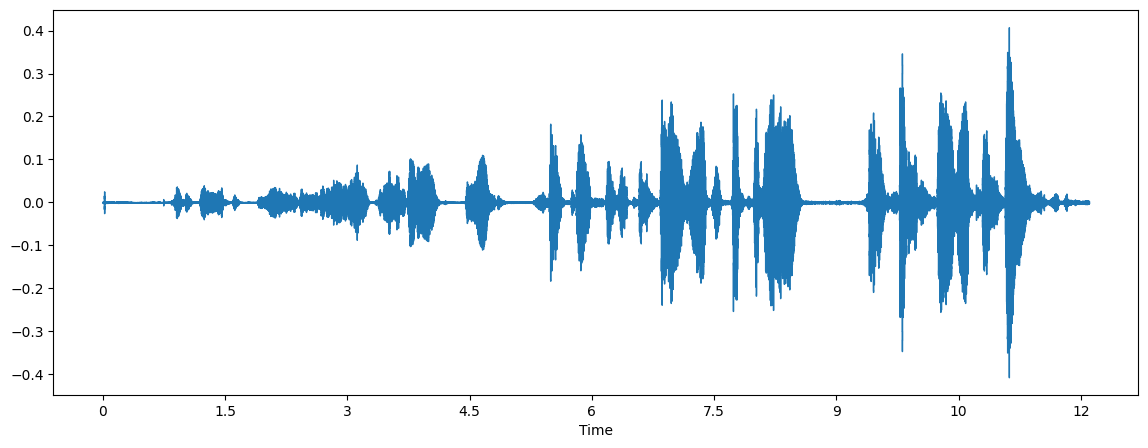

In [21]:
import librosa as lib 
import librosa.display as libD
import matplotlib.pyplot as plt 

aud , sr = lib.load('WhatsApp-Ptt-2025-03-30-at-17.30.15.wav')

plt.figure(figsize=(14,5))
libD.waveshow(aud , sr=sr)

/tmp/ipykernel_4750/3413026687.py:7: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  libD.specshow(aud2,ax=axs[0])


Text(0, 0.5, 'Decibeis')

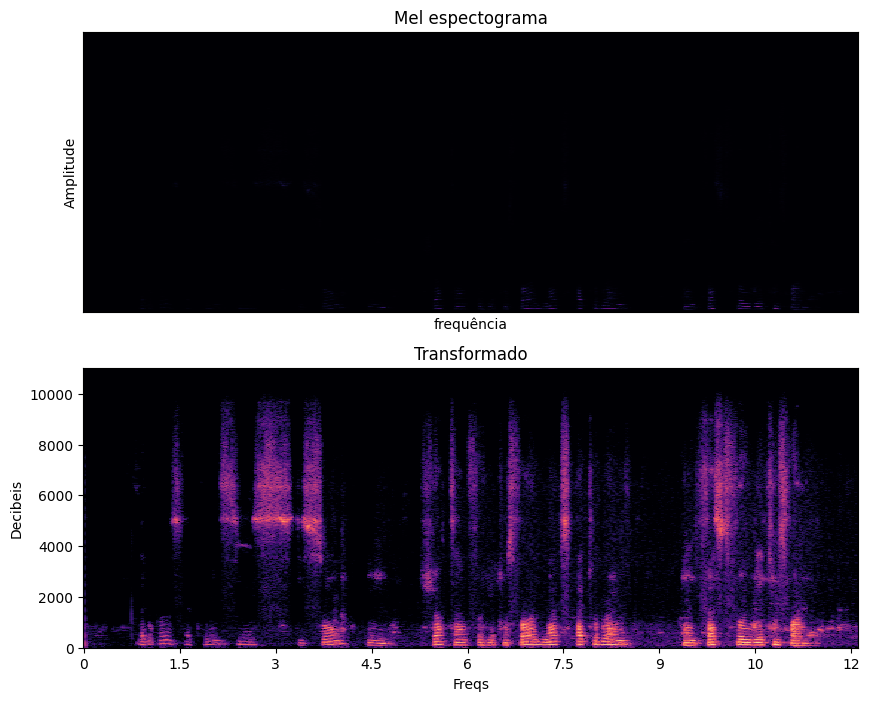

In [22]:
aud2 = lib.stft(aud)

dec = lib.amplitude_to_db(abs(aud2))

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

libD.specshow(aud2,ax=axs[0])
axs[0].set_title("Mel espectograma")
axs[0].set_xlabel("frequência")
axs[0].set_ylabel("Amplitude")

libD.specshow(dec , sr=sr , x_axis='time', y_axis='hz' , ax = axs[1])

axs[1].set_title("Transformado")
axs[1].set_xlabel("Freqs")
axs[1].set_ylabel("Decibeis")

Agora estaremos usando o mel-scale ao inves da frequência nativa 

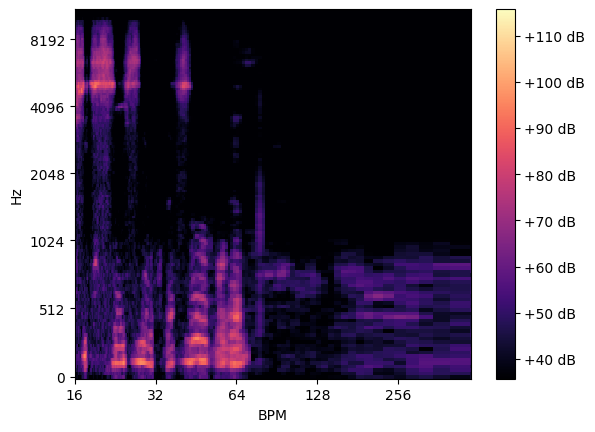

In [23]:
sgram , _ = lib.magphase(aud2)

mel_scale = lib.feature.melspectrogram(S=sgram , sr = sr)

mel_sgram = lib.amplitude_to_db(mel_scale , ref=np.min)

#libD.specshow(mel_scale)


libD.specshow(mel_sgram , sr=sr , x_axis='tempo' , y_axis='mel')
plt.colorbar(format='%+2.0f dB')

Fazendo agora a extração de MFccs com pytorch 

In [24]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T


torch.random.manual_seed(43)

def plot_waveform(wav , sr , titulo='figas' , ax=None):
    wav = wav.numpy()
    
    num_chan , num_frames = wav.shape
    time_axis = torch.arange(0 , num_frames) / sr 
    
    if ax is None:
        _ , ax = plt.subplot(num_chan , 1)
    ax.plot(time_axis , wav[0])
    ax.grid(True)
    ax.set_title(titulo)
    
def plot_espec(spec , title = 'figas2' , ylabel="freq_bin" , ax=None):
    if ax is None:
        _ , ax = plt.subplots(1 , 1)
    
    ax.set_ylabel(ylabel)
    ax.imshow(lib.power_to_db(spec) , origin="lower" , aspect="auto" , interpolation="nearest")
    
def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    


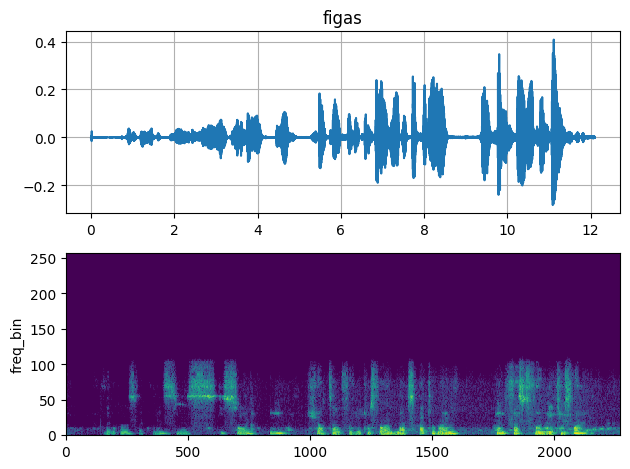

In [25]:
audio , sr = torchaudio.load("WhatsApp-Ptt-2025-03-30-at-17.30.15.wav")

spectogram = T.Spectrogram(n_fft=512)

spec = spectogram(audio)

fig, axs = plt.subplots(2,1)
plot_waveform(audio , sr , ax=axs[0])
plot_espec(spec[0] , ax=axs[1])
fig.tight_layout()

TODO: seguir o restante do tutorial do Mfcc https://pytorch.org/audio/main/tutorials/audio_feature_extractions_tutorial.html#sphx-glr-tutorials-audio-feature-extractions-tutorial-py

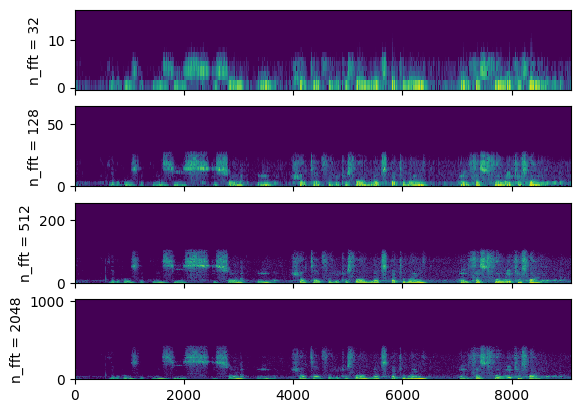

In [26]:
n_ffts = [32 , 128 , 512 , 2048]
hop_len = 64 

specs = [] 

for n_fft in n_ffts:
    spectogram = T.Spectrogram(n_fft=n_fft , hop_length=hop_len)
    spec = spectogram(audio)
    specs.append(spec)
    
fig , axs = plt.subplots(len(specs) , 1 , sharex=True)
for i , (spec , n_fft) in enumerate(zip(specs , n_ffts)):
    plot_espec(spec[0], ylabel=f"n_fft = {n_fft}" , ax=axs[i])
    axs[i].set_xlabel(None)


Fazendo o resample dos áudios originais, ou seja, mudando o sample rating do áudio 

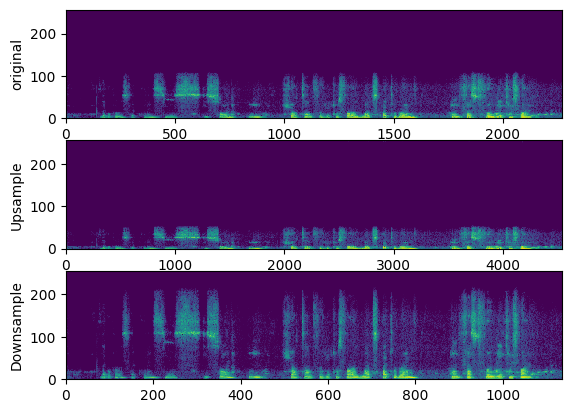

In [27]:
audio2 = torchaudio.functional.resample(audio , sr // 2, sr)
audio3 = torchaudio.functional.resample(audio , sr , sr // 2)

spectogram = T.Spectrogram(n_fft=512)

spec0 = spectogram(audio)
spec1 = spectogram(audio2)
spec2 = spectogram(audio3)

fig , axs = plt.subplots(3,1)
plot_espec(spec0[0] , ylabel="original" , ax=axs[0])
plot_espec(spec1[0] , ylabel="Upsample" , ax=axs[1])
plot_espec(spec2[0] , ylabel="Downsample" , ax=axs[2])


Como podemos recuperar uma onda a partir do seu espectograma?, podemos usar uma técnica chamada Griffin-Lim transformation

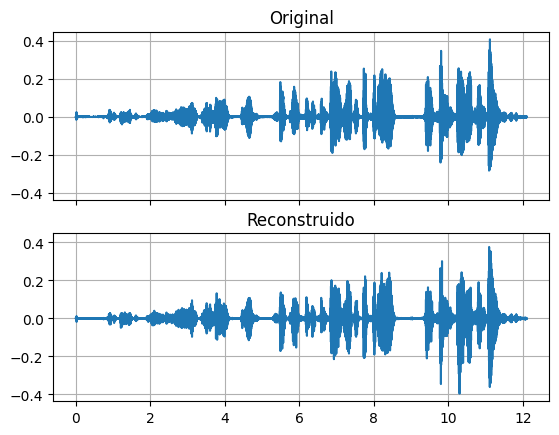

In [28]:
n_fft = 1024 

spectogram = T.Spectrogram(n_fft=n_fft)
griffin = T.GriffinLim(n_fft=n_fft)

spec = spectogram(audio)

recom = griffin(spec)

_,axes = plt.subplots(2 , 1 , sharex=True , sharey=True)
plot_waveform(audio , sr , titulo='Original' , ax=axes[0])
plot_waveform(recom , sr , titulo="Reconstruido" , ax=axes[1])
 

### Mel Filter Bank 

torchaudio.functional.melscale_fbanks() generate filter bank for converting frequency bins to mel-scale bins 

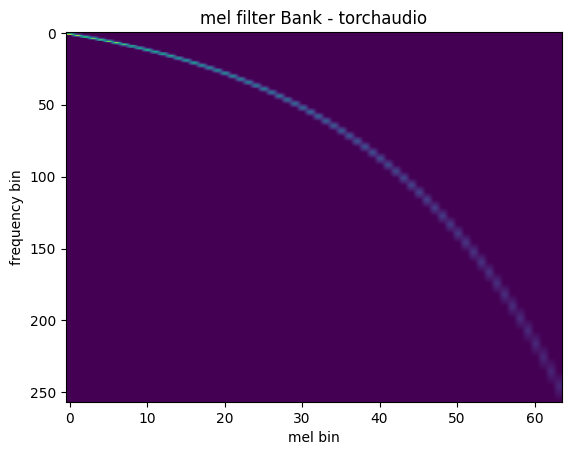

In [29]:
n_fft = 512 
n_mels = 64 
sr = 16000

mel_filters = F.melscale_fbanks(
    int(n_fft // 2 + 1),
    n_mels=n_mels,
    f_min=0.0,
    f_max=sr/2.0,
    sample_rate=sr,
    norm="slaney",
)

plot_fbank(mel_filters , "mel filter Bank - torchaudio")

### Mel espectograma 

Gerando uma escala mel-spectorgram involve, gera um spectograma que performa mel-scale conversion. 

Defninição do Mel espectograma 

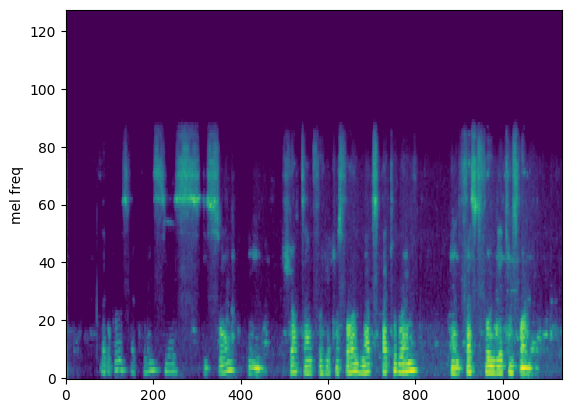

In [34]:
n_fft = 4096 
win_length = None 
h_len = 512 
n_mels = 128 

mel_espec2 = T.MelSpectrogram(
    sample_rate=sr,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=h_len,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    n_mels=n_mels,
    mel_scale="htk",
)

mel2 = mel_espec2(audio)

plot_espec(mel2[0] , title="MelSpecto" , ylabel="mel freq")

### Usando MFCC 

Definição do MFCC 

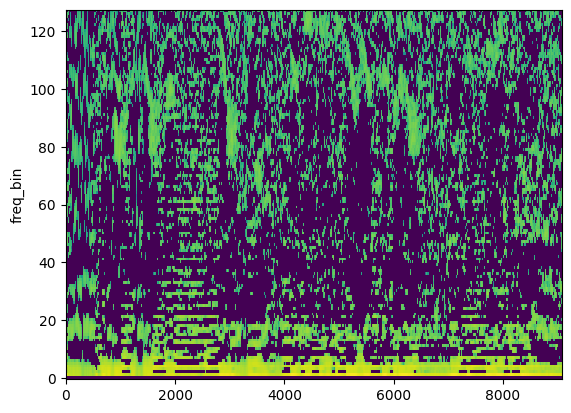

In [37]:
n_mfcc = 128

mfcc = T.MFCC(
    sample_rate = sr,
    n_mfcc=n_mfcc,
    melkwargs={
        "n_fft": n_fft,
        "n_mels": n_mels,
        "hop_length": hop_len,
        "mel_scale": "htk",
    },
)

mf = mfcc(audio)

plot_espec(mf[0] , title="MFCC")

### LFCC 

Definição do LFCC 

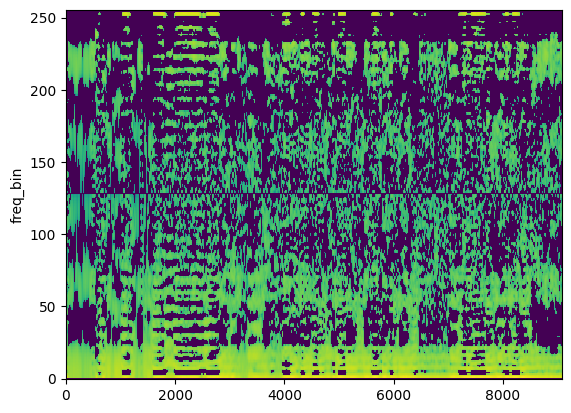

In [38]:
n_lfcc = 256 

lfcc_transform = T.LFCC(
    sample_rate=sr ,
    n_lfcc = n_lfcc,
    speckwargs={
        "n_fft" : n_fft,
        "win_length": win_length,
        "hop_length": hop_len,
    },
)

lfcc = lfcc_transform(audio) 

plot_espec(lfcc[0] , title="LFCC ")

### PITCH 

Usando agora o pitch para com o áudio de entrada 

O que seria o Pitch?

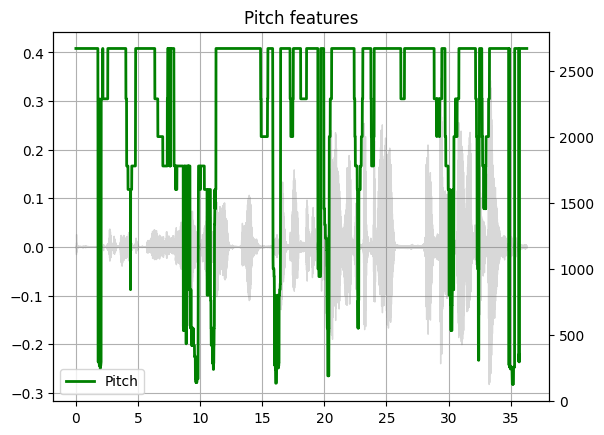

In [39]:
def plotPitch(wave , sr , pitch):
    fig , axs = plt.subplots(1,1)
    axs.set_title("Pitch features")
    axs.grid(True)
    end_time = wave.shape[1]/sr 
    time_ax = torch.linspace(0 , end_time , wave.shape[1])
    axs.plot(time_ax , wave[0], linewidth=1 , color="gray", alpha=0.3)
    
    axs2 = axs.twinx()
    time_ax = torch.linspace(0 , end_time , pitch.shape[1])
    axs2.plot(time_ax , pitch[0] , linewidth=2, label="Pitch", color="green")
    
    axs2.legend(loc=0)
    
pitch = F.detect_pitch_frequency(audio , sr)

plotPitch(audio , sr , pitch)